#### @author: Александр Владимирович Толмачев | axtolm@gmail.com
<hr>

## 1. Основы языка Python

## Часть 4. Библиотека для работы с данными pandas

### На этом занятии мы планируем:
- Познакомиться с библиотекой pandas и типами данных DataFrame и Series, популярными у аналитиков.

### 1. Библиотека pandas - типы данных pandas.Series и pandas.DataFrame

**pandas** - это высокоуровневая библиотека для анализа данных, которая содержит два класса объектов:

**class pandas.Series**  
Одномерный массив индексированных данных (временные ряды это тоже тут).  
Подробности на сайте библиотеки:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

**class pandas.DataFrame**  
Двумерный массив с гибкими индексами строк и гибкими именами столбцов. 
Каждый столбец можно рассматривать как объект pandas.Series.  
Подробности на сайте библиотеки:   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [1]:
import pandas as pd    # сначала импортируем библиотеку pandas под псевдонимом pd

In [2]:
db_tab_tmp = pd.DataFrame()    # создадим пустой датафрейм
print(type(db_tab_tmp))    # выведем тип

<class 'pandas.core.frame.DataFrame'>


In [3]:
# заполним DataFrame руками для примера 
# на практике так обычно не делается, т.к. данные мы откуда-то берем, а не придумываем сами
# исключение - расчетные фрагменты (по ходу выполнения алгоритма что-то посчитали и присоединили к большому DataFrame)
# возьмем для примера случай из учебной аналитики
# определим константы для заполнения
COURSE_ID = 'URFU_ENGM_F2019'  # id online курса
CHECK_POINT_NAME = 'ravg'      # название контрольной точки
N_STUDENTS = 10                # количество студентов

Заполним столбцы DataFrame с помощью генератора списков и генератора случайных чисел:

In [4]:
import random as rd    # импортируем библиотеку с генератором случайных чисел
rd.seed(1222)           # инициализируем генератор, чтобы получать всегда один набор значений

In [5]:
# заполним столбец идентификатора курса 'course_id' одним и тем же значением константы COURSE_ID
db_tab_tmp['course_id'] = [COURSE_ID for i in range(N_STUDENTS)]  

In [6]:
# заполним идентификатора студентов 'student_id' случайными числами от 1 до 10**6
# используем метод из библиотеки random: random.randint(A, B), который выдает случайное целое число N, A ≤ N ≤ B.
db_tab_tmp['student_id'] = [rd.randint(1, 10**6) for i in range(N_STUDENTS)] 

In [7]:
# заполним столбец названий контрольных точек 'check_point_name' значением константы CHECK_POINT_NAME
db_tab_tmp['check_point_name'] = [CHECK_POINT_NAME for i in range(N_STUDENTS)] 

In [8]:
# заполним столбец оценок 'grade' случайными числами от 0.0 до 1.0 и округлим их до 2-х знаков после запятой
db_tab_tmp['grade'] = [round(rd.random(),2) for i in range(N_STUDENTS)] 

In [9]:
db_tab_tmp    # выведем DataFrame на экран

,course_id,student_id,check_point_name,grade
0,URFU_ENGM_F2019,596729,ravg,0.49
1,URFU_ENGM_F2019,514764,ravg,0.28
2,URFU_ENGM_F2019,429897,ravg,0.24
3,URFU_ENGM_F2019,686324,ravg,0.39
4,URFU_ENGM_F2019,612259,ravg,0.92
5,URFU_ENGM_F2019,753407,ravg,0.90
6,URFU_ENGM_F2019,12479,ravg,0.75
7,URFU_ENGM_F2019,330129,ravg,0.04
8,URFU_ENGM_F2019,804278,ravg,0.26
9,URFU_ENGM_F2019,605780,ravg,0.31


In [10]:
type(db_tab_tmp['grade']) # выведем тип одной колонки

pandas.core.series.Series

**Обратим внимание на первую колонку с индексом DataFrame!** - значения по порядку от 0 и названия колонки нет

In [11]:
# Можем задать индекс своими руками на свое усмотрение, например 100, 101, ...
db_tab_tmp.index = [i for i in range(100,100+N_STUDENTS)]
db_tab_tmp.index.name = 'our_index'    # Название индексу тоже можем дать свое
db_tab_tmp

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,596729,ravg,0.49
101,URFU_ENGM_F2019,514764,ravg,0.28
102,URFU_ENGM_F2019,429897,ravg,0.24
103,URFU_ENGM_F2019,686324,ravg,0.39
104,URFU_ENGM_F2019,612259,ravg,0.92
105,URFU_ENGM_F2019,753407,ravg,0.90
106,URFU_ENGM_F2019,12479,ravg,0.75
107,URFU_ENGM_F2019,330129,ravg,0.04
108,URFU_ENGM_F2019,804278,ravg,0.26


**Доступ к элементам DataFrame**

In [12]:
# доступ к строке целиком по имени индекса
db_tab_tmp.loc[101]

course_id           URFU_ENGM_F2019
student_id                   514764
check_point_name               ravg
grade                          0.28
Name: 101, dtype: object

In [13]:
# доступ к строке целиком по номеру индекса
db_tab_tmp.iloc[1]

course_id           URFU_ENGM_F2019
student_id                   514764
check_point_name               ravg
grade                          0.28
Name: 101, dtype: object

In [14]:
# срезы (slices) по индексу тоже работают
db_tab_tmp.iloc[5:7]

,course_id,student_id,check_point_name,grade
our_index,,,,
105,URFU_ENGM_F2019,753407,ravg,0.90
106,URFU_ENGM_F2019,12479,ravg,0.75


In [15]:
# доступ к конкретному элементу таблицы по имени индекса и имени колонки
db_tab_tmp.loc[101]['grade']

0.28

**Фильтрация элементов DataFrame**

In [16]:
# по значению элементов одного из столбцов (можно использовать >, <, ==, !=, >=, <=)
db_tab_tmp[db_tab_tmp.grade>=0.4]

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,596729,ravg,0.49
104,URFU_ENGM_F2019,612259,ravg,0.92
105,URFU_ENGM_F2019,753407,ravg,0.90
106,URFU_ENGM_F2019,12479,ravg,0.75


In [17]:
# по конкретным id студентов
# для этого используем метод pandas.DataFrame.isin
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
need_students = [596729	,12479]  # зададим руками список id интересующих нас студентов
db_tab_tmp[db_tab_tmp['student_id'].isin(need_students)]

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,596729,ravg,0.49
106,URFU_ENGM_F2019,12479,ravg,0.75


In [18]:
# как работает то, что внутри []
db_tab_tmp['student_id'].isin(need_students)

our_index
100     True
101    False
102    False
103    False
104    False
105    False
106     True
107    False
108    False
109    False
Name: student_id, dtype: bool

**Объект DataFrame имеет очень широкий набор собственных методов для работы с данными**<br>
**Подробности на сайте библиотеки:**

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

**Рассмотрим некоторые из методов**  
**1) Добавление одного DataFrame к другому**

In [19]:
# Сделаем еще один DataFrame, немного модифицируем и присоединим к исходному db_tab_tmp
db_new = db_tab_tmp[db_tab_tmp.grade>0.7]  # получим фильтрацией из исходного df
db_new.loc[:]['check_point_name'] = 'tavg'       # изменим значения в одной колонке
db_new

,course_id,student_id,check_point_name,grade
our_index,,,,
104,URFU_ENGM_F2019,612259,tavg,0.92
105,URFU_ENGM_F2019,753407,tavg,0.90
106,URFU_ENGM_F2019,12479,tavg,0.75


Используем метод pandas.DataFrame.append<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html

In [20]:
db_tab_tmp = db_tab_tmp.append(db_new)
db_tab_tmp

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,596729,ravg,0.49
101,URFU_ENGM_F2019,514764,ravg,0.28
102,URFU_ENGM_F2019,429897,ravg,0.24
103,URFU_ENGM_F2019,686324,ravg,0.39
104,URFU_ENGM_F2019,612259,ravg,0.92
105,URFU_ENGM_F2019,753407,ravg,0.90
106,URFU_ENGM_F2019,12479,ravg,0.75
107,URFU_ENGM_F2019,330129,ravg,0.04
108,URFU_ENGM_F2019,804278,ravg,0.26


**2) Группировка по 'check_point_name' и подсчет средних оценок по контрольным точкам** 

Используем метод pandas.DataFrame.groupby<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [21]:
db_tab_tmp.groupby(['check_point_name']).mean()

,student_id,grade
check_point_name,,
ravg,534604.600000,0.458000
tavg,459381.666667,0.856667


Усреднение по student_id смысла не имеет, а вот со средними по grade можно работать

In [22]:
# результат pandas.DataFrame.groupby - это тоже pandas.DataFrame и доступ к данным как к ячейке таблицы
# выберем среднее по grade для контрольной точки с check_point_name = 'ravg'
db_group = db_tab_tmp.groupby(['check_point_name']).mean()
db_group['grade'].loc['ravg']

0.4579999999999999

In [23]:
# это же можно записать в одну строчку 
db_tab_tmp.groupby(['check_point_name']).mean()['grade'].loc['ravg']

0.4579999999999999

**3) Группировка по 'check_point_name' и подсчет количества оценок по контрольным точкам** 

Используем метод pandas.DataFrame.count<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html

In [24]:
db_tab_tmp.groupby(['check_point_name']).count()

,course_id,student_id,grade
check_point_name,,,
ravg,10,10,10
tavg,3,3,3


In [25]:
# получение одного нужного значения 
db_tab_tmp.groupby(['check_point_name']).count()['grade'].loc['tavg']

3

**4) Построим гистограмму распределения по grade** 

Используем метод pandas.DataFrame.hist<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

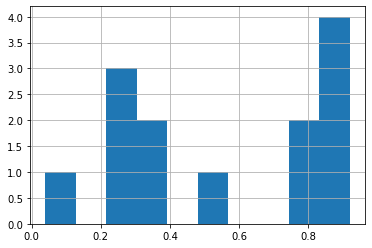

In [26]:
grade_hist = db_tab_tmp['grade'].hist(bins = 10)

**5) Изменим тип всех элементов колонки 'grade'** 

Используем метод pandas.DataFrame.astype<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [27]:
db_tab_tmp['grade_str'] = db_tab_tmp['grade'].astype(str)    # преобразуем оценку в строку и сохраним в новой колонке

In [28]:
print(type(db_tab_tmp.iloc[0]['grade']),type(db_tab_tmp.iloc[0]['grade_str']))     # проверим типы данных

<class 'numpy.float64'> <class 'str'>


**6) Подсчет суммы по колонке 'grade'** 

Используем метод pandas.DataFrame.sum<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html<br>
Важно! метод и аналогичные ему (mean, std, count,...) игнорирует пропуски данных NaN

In [29]:
db_tab_tmp['grade'].sum()

7.1499999999999995

In [30]:
db_tab_tmp['grade'].mean()

0.5499999999999999

### Подведем итоги. На этом занятии мы:
- Познакомились с библиотекой pandas и типами данных DataFrame и Series, а также с отдельными методами работы с данными.